In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import math
import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/dataset/ex2data1.txt


In [2]:
def sigmoid(z):
    return 1/(1+math.exp(-z))

def compute_cost(X, y, w, b):
    m,n = X.shape
    cost= 0
    for i in range(m):
        z = np.dot(X[i], w) +b
        pred = sigmoid(z)
        if y[i]==1:
            cost += - math.log2(pred)
        else:
            cost += - math.log2(1-pred)
    cost/=m
    return cost

def compute_gradient(X, y, w, b):
    m,n = X.shape
    d_dw = np.zeros(n)
    d_db = 0
    for i in range(m):
        z = np.dot(X[i], w) +b
        pred = sigmoid(z)
        d_db += (pred - y[i])
        for j in range(n):
            d_dw[j] += (pred - y[i]) * X[i,j]
    d_dw /=m
    d_db /= m
    return d_dw, d_db

def gradient_descent(X,y,w_init,b_init, alpha, epsilon, iterations):
    w = w_init
    b = b_init
    m,n = X.shape
    cost = compute_cost(X,y,w,b)
    itr =0
    J_history=[]
    while cost>epsilon and itr<iterations:
        d_dw, d_db = compute_gradient(X,y,w,b)
        w = w - alpha*d_dw
        b = b - alpha * d_db
        cost = compute_cost(X,y,w,b)
        if itr<100000:    
            J_history.append(cost)  # needed for plotting the learning curve
        itr +=1 
    return w, b, itr, J_history

In [3]:
df = np.array(pd.read_csv('../input/dataset/ex2data1.txt'))
x = df[:, :2]
y = df[:, 2]
print(f"First 5 elements in X-train:\n {x[:5]}")
print(f"Their actual class is: \n {y[:5]}")

First 5 elements in X-train:
 [[30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]]
Their actual class is: 
 [0. 0. 1. 1. 0.]


In [4]:
print(f"Type of X-train : {type(x)}. \n It's Shape: {x.shape}.")
print(f"Type of y-train : {type(y)}. \n It's Shape: {y.shape}.")

Type of X-train : <class 'numpy.ndarray'>. 
 It's Shape: (99, 2).
Type of y-train : <class 'numpy.ndarray'>. 
 It's Shape: (99,).


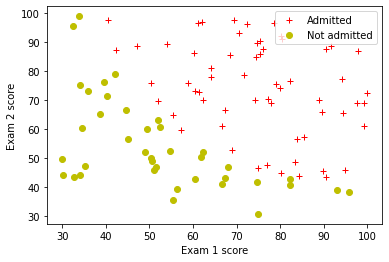

In [5]:
# Scatter plot of the training data
def plot_data(x,y, pos_label = 'y=1', neg_label='y=0'): #plot_data() is a function to plot your training data and able to diffrentiate between positive(1) and negative'0' classes
    pos = y == 1 #pos now is boolean array of size  n [true, false,......]
    neg = y == 0 
    plt.plot(x[pos,0],x[pos,1], 'r+', label=pos_label)
    plt.plot(x[neg,0],x[neg,1], 'yo', label=neg_label)
# Set the y-axis label
plot_data(x,y,'Admitted','Not admitted')
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

In [6]:
m,n = x.shape
initial_w = np.zeros(n)
initial_b = 0
alpha = 0.004
iterations = 300000
epsilon=0.1
w,b,itr, J_history = gradient_descent(x,y,initial_w, initial_b,alpha, epsilon,iterations)

In [7]:
print(f"Best values for Weights: {w}")
print(f"Best value for b parameters: {b}")
cost = compute_cost(x,y,w,b)
print(f"Those weights produce a cost equals: {cost}")
print(f"Gradient Decent reached those values after {itr} iterations.")

Best values for Weights: [0.19614584 0.19261095]
Best value for b parameters: -23.968418475056843
Those weights produce a cost equals: 0.29529682038102134
Gradient Decent reached those values after 300000 iterations.


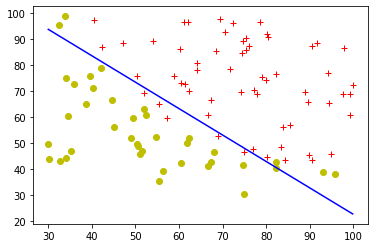

In [8]:
def plot_decision_boundary(w, b, X, y):
    # This part works only when we have max of 2 features (C!W# utils.py for more), Credit to dibgerge on Github for this plotting code 
    
    plot_data(X[:, 0:2], y)  #scattering the data points 
    plot_x = np.array([min(X[:, 0]), max(X[:, 0])])  # plotting the decision boundry 'straigh line' using 2 graph point (X_minVal, crossponding_y) = y-intercept, (X_maxVal, crossponfing_y)
    plot_y = (-1. / w[1]) * (w[0] * plot_x + b)  #w1x1+w2x2+b=0, w1x1+b=-w2x2, x2= (w1x1+b)/-w2  to calculate the movement on the y-axis which represents the second feature'Exam 2 score'
    plt.plot(plot_x, plot_y, c="b")
        
plot_decision_boundary(w,b,x,y)

In [9]:
def predict(x,w,b, threshold=0.5):
    m,n = x.shape
    p = np.zeros(m)
    for i in range(m):
        z = np.dot(w,x[i])+b
        f_x = sigmoid(z)
        if f_x>= 0.5:
            p[i] = 1
        else:
            p[i] = 0
    return p
def accuracy(y_pred, y):
    m = len(y)
    acc = 0
    for i in range(m):
        if y_pred[i] == y[i]:
            acc +=1
    acc = (acc/m)*100
    return acc

In [10]:
# use the predict function to make prediction of X_train and test the accuracy of the chosen parameters using accuracy
y_pred = predict(x,w,b)
print(accuracy(y_pred, y))

88.88888888888889
